# Data Cleaning & Preprocessing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Airbnb_Open_Data.csv')
data.head(5)

C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\3975306117.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


By running this code, we get a quick preview of our data. It allows us to see the column names and the types of values we’re working with, helping us understand the structure of the dataset before doing any further analysis.

In [5]:
data.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


This helps us check how our dataset ends.

In [6]:
data.shape

(102599, 26)

The output is a tuple in the form (rows, columns). This tells us how many entries (rows) and features (columns) our dataset contains. It's useful for understanding the dataset's size.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

This helps us identify missing values and understand the data types of each column (ex: int, float, object). It gives us a clear overview of what kind of data we’re working with. We learn the following about our dataset:

- It has 102,599 rows and 26 columns.
- Some columns contain missing values (ex: license has only 2 non-null values).
- Most columns have the correct data types, but there are a few issues:

1. **price** and **service fee** are stored as object instead of float : This error occurs because of the $ symbol used in the two columns.
2. **last review** is an object, but it represents dates : We should convert it to datetime



In [8]:
data['price'] = data['price'].replace('[\$,]','', regex = True).astype(float)
data['service fee'] = data['service fee'].replace('[\$,]','', regex = True).astype(float)
data['last review'] = pd.to_datetime(data['last review'], errors = 'coerce')

We clean the **price** and **service fee** columns by removing dollar signs ($) using regex, then convert the cleaned strings to float. We also convert the **last review** column to datetime format, using errors='coerce' to handle invalid or missing dates.

In [9]:
data[['price','service fee', 'last review']].head(10)

,price,service fee,last review
0,966.0,193.0,2021-10-19
1,142.0,28.0,2022-05-21
2,620.0,124.0,NaT
3,368.0,74.0,2019-07-05
4,204.0,41.0,2018-11-19
5,577.0,115.0,2019-06-22
6,71.0,14.0,2017-10-05
7,1060.0,212.0,2017-10-05
8,1018.0,204.0,2019-06-24
9,291.0,58.0,2017-07-21


We display the first 10 rows of the **price**, **service fee**, and **last review** columns to verify that the cleaning and conversion steps were successful. After running this line, we can see that **price** and **service fee** now appear as numeric values and **last review** values are in proper date format.

In [10]:
data.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


We use data.describe() to generate summary statistics for the numeric columns in our dataset. This includes count, mean, standard deviation, min, max and the 25th, 50th (median) and 75th percentiles. It helps us quickly understand the distribution and detect potential anomalies or outliers. Issues observed from the output:
- **minimum nights**
1. Min value: -1223.0 — This is invalid, as the number of minimum nights cannot be negative.
2. Max value: 5645.0 — This is highly unusual and may represent bad data.

- **last review**
1. Max value: 2058-06-16 — This is a future date, which is likely incorrect or a data entry error.

- **availability_365**
1. Min value: -10.0 — This is invalid. Availability cannot be negative.
2. Max value: 3677.0 — The value exceeds the number of days in a year 

In [11]:
data.drop(['NAME', 'host name', 'house_rules', 'license'], axis = 1, inplace = True)

We drop the columns **NAME**, **host name**, **house_rules**, and **license** from our dataset because they are not useful for our analysis. We use axis=1 to indicate that we're dropping columns, and inplace=True to apply the change directly to the original DataFrame.

In [12]:
data.isnull().sum()

id                                    0
host id                               0
host_identity_verified              289
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

This gives us a clear overview of which columns have missing data and how many values are missing in each. It helps us decide which columns need to be cleaned or possibly dropped.

In [13]:
data['host_identity_verified'].fillna('unknown', inplace = True)
data['instant_bookable'].fillna('unknown', inplace = True)
data['cancellation_policy'].fillna('unknown', inplace = True)

C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\963968420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['host_identity_verified'].fillna('unknown', inplace = True)
C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\963968420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

These columns are categorical. Rather than removing rows with missing values or making risky assumptions, we explicitly mark them as 'unknown'.

In [14]:
data['neighbourhood group'].value_counts()

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

Most listings are located in Manhattan (43,792) and Brooklyn (41,842), followed by Queens, Bronx and Staten Island. However, we also notice two suspicious entries:
- 'brookln' with 1 listing
- 'manhatan' with 1 listing

These are likely misspellings of 'Brooklyn' and 'Manhattan'.
These typos introduce inconsistency in the data and should be corrected to ensure accurate grouping and analysis. Leaving them uncorrected would lead to misleading statistics, as the same neighborhood is treated as a different category.

In [15]:
data['neighbourhood group'] = data['neighbourhood group'].replace({
    'brookln': 'Brooklyn',
    'manhatan' : 'Manhattan'
})

data['neighbourhood group'].value_counts()

neighbourhood group
Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: count, dtype: int64

We use replace() to correct misspellings in the **neighbourhood group** column, changing 'brookln' to 'Brooklyn' and 'manhatan' to 'Manhattan'. Then, we use value_counts() again to verify the updated distribution.

In [16]:
mapping = data[data['neighbourhood group'].notna()].drop_duplicates(subset=['neighbourhood'])\
           .set_index('neighbourhood')['neighbourhood group'].to_dict()

data['neighbourhood group'] = data.apply(
    lambda row: mapping[row['neighbourhood']] if pd.isna(row['neighbourhood group']) and row['neighbourhood'] in mapping else row['neighbourhood group'],
    axis=1
)

We can deduce the **neighbourhood group** based on the **neighbourhood**, if we know which group each neighbourhood belongs to. We create a mapping between **neighbourhood** and **neighbourhood group** using only the rows where **neighbourhood group** is not missing. Then, we apply this mapping to fill in the missing values in the **neighbourhood group** column.

In [17]:
data = data.dropna(subset=['neighbourhood'])

Since **neighbourhood** is a key location-based feature, rows without this information are not useful for our analysis. Unlike missing numerical values that we might impute, missing categorical geographic data like **neighbourhood** can't be precisely determined without external sources

In [18]:
data = data.dropna(subset=['lat','long'])

Latitude and longitude are essential for spatial analysis, mapping, and any geolocation-based processing. Missing values in these columns cannot be accurately determined because we do not have any reliable way to identify a listing’s exact coordinates without external data.

In [19]:
data['country'].fillna('United States', inplace = True)
data['country code'].fillna('US', inplace = True)

C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\1015908805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna('United States', inplace = True)
C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\1015908805.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Since our dataset contains only listings from the United States, it is safe and consistent to assume that any missing values in these columns also refer to the same country. Filling them ensures that the dataset remains complete without introducing incorrect information.

In [20]:
data['Construction year'].fillna(data['Construction year'].median(), inplace = True)
data['service fee'].fillna(data['service fee'].median(), inplace = True)
data['price'].fillna(data['price'].median(), inplace = True)

C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\1295811357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Construction year'].fillna(data['Construction year'].median(), inplace = True)
C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\1295811357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

These columns are numerical and contain missing values that need to be handled for analysis. We choose the median instead of the mean because it is more robust to outliers. In real-world datasets, columns like price or service fee often contain extreme values (very high or very low), which can distort the mean. The median provides a more stable and representative central value. This ensures that the imputed data does not artificially inflate or deflate the overall distribution and keeps the dataset consistent for further analysis.

In [21]:
data.isnull().sum()

id                                    0
host id                               0
host_identity_verified                0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                      408
number of reviews                   183
last review                       15892
reviews per month                 15878
review rate number                  326
calculated host listings count      319
availability 365                    447
dtype: int64

In [22]:
data['minimum nights'].describe()

count    102167.000000
mean          8.133996
std          30.552134
min       -1223.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum nights, dtype: float64

The column contains extreme and invalid values. The minimum is -1223, which is not logically possible, as a listing cannot require a negative number of nights. The maximum is 5645, which is also unusually high and likely an error or outlier. These invalid and unrealistic values should be removed to improve the reliability of the dataset.

In [23]:
data = data[(data['minimum nights'] >=1) & (data['minimum nights'] <=60)]
data['minimum nights'].fillna(data['minimum nights'].median(), inplace= True)

C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\1050406190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['minimum nights'].fillna(data['minimum nights'].median(), inplace= True)


Negative values and excessively high values like 5645 are unrealistic and can distort our analysis. By keeping values between 1 and 60, we retain the vast majority of realistic entries while removing clear errors and outliers. Using the median to fill any remaining missing values ensures that the imputed values are consistent with the typical behavior in the dataset and are not influenced by remaining outliers.

In [24]:
data[data['number of reviews'].isna()][['reviews per month', 'last review']]

,reviews per month,last review
566,0.65,2019-07-01
1066,0.64,2018-09-30
1591,0.43,2018-09-18
2141,3.68,2019-06-21
3149,3.49,2019-07-02
...,...,...
91027,0.13,2019-01-01
91831,1.33,2019-06-25
99736,0.38,2018-10-10
100590,0.63,2019-06-25


We initially assumed that if **number of reviews** is missing (NaN), it might mean the listing has zero reviews. To verify this, we looked at two related columns: **reviews per month** and **last review**. However, the result shows that many of these rows actually have non-zero values in reviews per month and valid dates in last review, which proves that they did receive reviews.

In [25]:
test = data[(data['reviews per month'] == 0) & (data['number of reviews'].isna())].shape[0]
test

0

The idea was: if **reviews per month** is 0, it might mean the listing has no reviews at all - so we could consider setting **number of reviews** to 0 in those cases. However, the result showed that no listings have **reviews per month == 0**, which means every row has some level of review activity. This confirms that missing values in **number of reviews** should not be assumed to be 0

In [26]:
data['number of reviews'].fillna(data['number of reviews'].median(), inplace = True)

C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\2569046593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['number of reviews'].fillna(data['number of reviews'].median(), inplace = True)


This step ensures that there are no missing values left in **number of reviews**. The median is chosen because the distribution of review counts is likely skewed, with many listings having few reviews and a few having very high numbers. Using the median avoids the influence of those extreme values and provides a stable, central value that better represents a typical listing

In [27]:
test1 = data[(data['number of reviews'] >= 1) & (data['last review'].isna())].shape[0]
test1

150

We did this to identify listings that are inconsistent — they claim to have one or more reviews, but the date of the **last review** is missing. In this case, the result shows that only 150 listings meet this condition. Since the number is small and there is no reliable way to determine the missing **last review** dates, the best solution is to remove these rows.

In [28]:
data = data[~((data['number of reviews'] > 0) & (data['last review'].isna()))]

This line removes the 150 inconsistent rows where a listing has at least one review but no recorded last review date.

In [29]:
test2 = (data['number of reviews'] == 0) & (data['reviews per month'].isna())
test2.sum()

np.int64(15404)

We count how many listings have no reviews at all and also have no value in **reviews per month**. This is logically consistent: if a listing has no reviews, it's expected to have 0 reviews per month.

In [30]:
data.loc[(data['number of reviews'] == 0 ) & (data['reviews per month'].isna()), 'reviews per month'] = 0

We explicitly set **reviews per month** to 0 for those listings, filling in the missing values with a value that makes sense.

In [31]:
data['reviews per month'].isnull().sum()

np.int64(7)

We check how many missing values remain in the **reviews per month** column after the fill. This helps us confirm the previous step worked.



In [32]:
data = data[~((data['number of reviews'] > 0) & (data['reviews per month'].isna()))]

The 7 remaining rows have missing **reviews per month** values, even though they have a **number of reviews** greater than 0. This is a logical inconsistency, because if a listing has received reviews, it should also have an average monthly review rate. Since there are only a small number of inconsistent rows, we choose to remove them rather than attempt to impute a value that we cannot accurately determine.

In [33]:
test3 = (data['number of reviews'] == 0) & (data['review rate number'].isna())
test3.sum()

np.int64(33)

We check how many listings have no reviews and are also missing a **review rate number**. This field can be zero.

In [34]:
data.loc[data['number of reviews'] == 0, 'review rate number'] = 0

To fix the missing cases, we set **review rate number** to 0 for all listings that have 0 reviews. This keeps the data logically consistent.

In [35]:
test4 = (data['number of reviews'] == 0) & (data['review rate number'] > 0)
test4.sum()

np.int64(0)

We find 15,371 listings that have no reviews but a non-zero review rating, which is a contradiction. A review score should come from actual reviews.

In [36]:
data['review rate number'].isnull().sum()
data = data[~((data['number of reviews'] > 0) & (data['review rate number'].isna()))]

Now there are only 267 missing values left in the column. Because these inconsistencies only appear in a small number of rows, we choose to remove them instead of trying to estimate the missing values. This decision has minimal impact on the dataset size.

In [37]:
data[['calculated host listings count','availability 365']].describe()

,calculated host listings count,availability 365
count,100721.000000,100627.000000
mean,7.898939,140.551115
std,32.106886,135.394678
min,1.000000,-10.000000
25%,1.000000,3.000000
50%,1.000000,95.000000
75%,2.000000,268.000000
max,332.000000,3677.000000


We used describe() to examine the distribution of values in the **calculated host listings count** and **availability 365** columns. For **availability 365**, we notice a minimum value of -10, which is invalid, and a maximum value of 3677, which is far beyond the possible number of days in a year. These extreme values suggest data entry errors that need to be cleaned in the next step

In [38]:
data['calculated host listings count'].fillna(1, inplace = True)

C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\1547041025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['calculated host listings count'].fillna(1, inplace = True)


We fill missing values in **calculated host listings count** with 1, assuming that a host with no recorded data most likely has a single listing. 

In [39]:
data = data[(data['availability 365'] >= 0) & (data['availability 365'] <= 365)]

Next, we filter the dataset to keep only the rows where **availability 365** is between 0 and 365, removing any invalid values like -10 or 3677, which are outside the logical range for days in a year.

In [40]:
data['availability 365'].fillna(0, inplace=True)

C:\Users\Edy\AppData\Local\Temp\ipykernel_21268\2381292668.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['availability 365'].fillna(0, inplace=True)


Finally, we fill any remaining missing values in **availability 365** with 0, meaning the listing is not available at all during the year.

In [41]:
data.isnull().sum()

id                                    0
host id                               0
host_identity_verified                0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
last review                       14620
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
dtype: int64

The output shows that every column has zero missing values, except for last review, which still has 14,620 missing entries. This is expected and acceptable because these rows correspond to listings with zero reviews. All other columns are now fully clean and consistent, meaning the dataset is ready for further analysis without risk of errors due to missing data.

In [42]:
anomalies = {}

anomalies['1'] = data[(data['reviews per month'] > 0) & (data['number of reviews'] == 0)]
anomalies['2'] = data[(data['review rate number'] > 0) & (data['number of reviews'] == 0)]
anomalies['3'] = data[(data['number of reviews'] > 0) & (data['review rate number'].isna())]
anomalies['4'] = data[(data['number of reviews'] > 0) & (data['reviews per month'] == 0)]
anomalies['5'] = data[(data['number of reviews'] > 0) & (data['last review'].isna())]
anomalies['6'] = data[(data['availability 365'] < 0) | (data['availability 365'] > 365)]
anomalies['7'] = data[data['minimum nights'] > data['availability 365']]


anomaly_summary = {k: v.shape[0] for k, v in anomalies.items()}
anomaly_summary

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 24820}

We found 24,820 listings where the **minimum nights** required is greater than the **availability 365**, meaning the listing is available for fewer days per year than the minimum booking requirement. However, we cannot conclude this is a true error. These listings might be deliberately blocked or inactive for most of the year by the host, or used privately. The host may set a high minimum stay while keeping the availability limited, possibly to prevent bookings while keeping the listing active.

# Exploratory Data Analysis

In this section, we will perform a univariate analysis of the **price** variable. The goal is to understand the distribution, central tendency, and potential outliers of the prices listed on Airbnb. 

In [43]:
data['price'].describe()

count    97481.000000
mean       626.079246
std        331.306704
min         50.000000
25%        341.000000
50%        625.000000
75%        913.000000
max       1200.000000
Name: price, dtype: float64

- Count: There are 97,481 listings with a valid price value.
- Mean: The average price is $626.08.
- Standard Deviation (std): The standard deviation is $331.31, indicating a wide spread of prices around the mean.
- Min: The lowest price in the dataset is $50.
- 25th Percentile: 25% of listings have a price below $341.
- Median (50%): The median price is $625, meaning half of the listings are below this value and half above.
- 75th Percentile: 75% of listings have a price below $913.
- Max: The highest price is $1200.

These values suggest that most listings are priced between $341 and $913. The mean and median are very close, indicating the distribution is relatively symmetrical, but we will confirm that by visualizing the data.


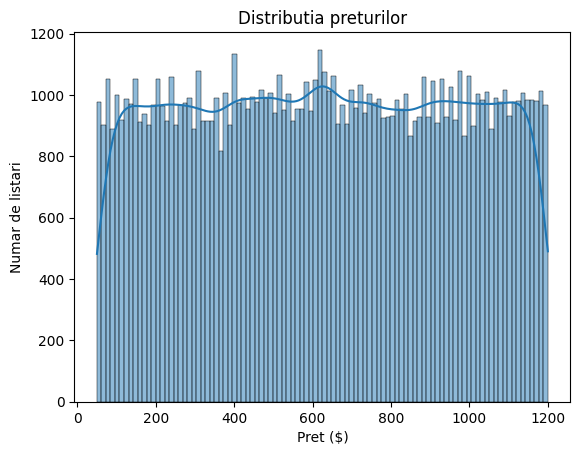

In [44]:
sns.histplot(data['price'], bins=100, kde=True)
plt.title('Distributia preturilor')
plt.xlabel('Pret ($)')
plt.ylabel('Numar de listari')
plt.show()

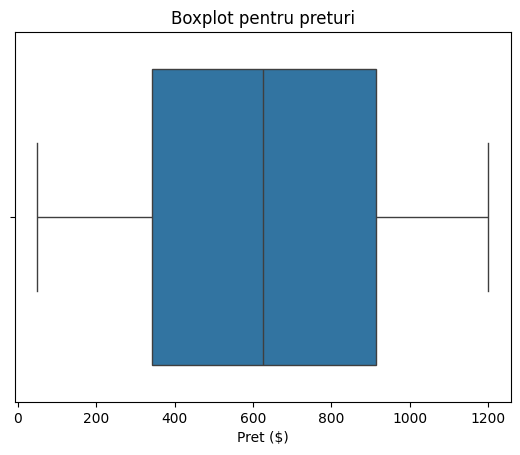

In [45]:
sns.boxplot(x=data['price'])
plt.title('Boxplot pentru preturi')
plt.xlabel('Pret ($)')
plt.show()

Based on the descriptive statistics, the **price** variable has a mean of approximately $626 and a median of $625, which indicates that the distribution is fairly symmetric. The standard deviation is around $331, showing that prices vary quite a bit around the mean.

The histogram with KDE further supports these observations. The distribution appears to be relatively flat, with a slight concentration of listings around the $600–$700 range. There is no clear peak in the distribution, and it does not show strong skewness. The KDE curve is smooth and centered, confirming the near-symmetry observed in the summary statistics.

The boxplot also aligns with the previous findings. The median is visibly centered in the box, and the whiskers extend from the minimum to the maximum values without showing any individual outliers. This suggests that the price values are well distributed and do not contain extreme values that could distort the analysis.

________________________________________________________________________________________________________

In [46]:
avg_price_by_neighbourhood = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
top_10 = avg_price_by_neighbourhood.head(10)
last_10 = avg_price_by_neighbourhood.tail(10)

print(top_10)
print(last_10)

neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Arden Heights              804.888889
Midland Beach              796.176471
Shore Acres                786.772727
East Morrisania            778.947368
Mill Basin                 775.142857
Name: price, dtype: float64
neighbourhood
Randall Manor                 465.954545
West Farms                    463.166667
Emerson Hill                  443.800000
Castleton Corners             437.750000
Bay Terrace, Staten Island    429.500000
Richmondtown                  373.400000
Spuyten Duyvil                347.166667
Breezy Point                  309.888889
Rossville                     247.000000
Lighthouse Hill               107.666667
Name: price, dtype: float64


The analysis shows the **neighborhoods** with the highest and lowest average Airbnb prices. For example, New Dorp, Chelsea (Staten Island) and Fort Wadsworth have average nightly prices exceeding $1,000, while **neighborhoods** like Rossville and Lighthouse Hill are below $300. However, before drawing conclusions, it's important to verify the number of listings in each of these **neighborhoods**. Many of the areas appearing at the top or bottom of the list may have very few active listings, which can lead to unreliable average prices.

In [47]:
data['neighbourhood'].value_counts()

neighbourhood
Bedford-Stuyvesant        7599
Williamsburg              7385
Harlem                    5129
Bushwick                  4752
Hell's Kitchen            3796
                          ... 
Willowbrook                  3
Fort Wadsworth               2
Rossville                    2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

To ensure a more accurate and reliable analysis, we want to excluded **neighborhoods** with fewer than 100 listings. Neighborhoods with a very small number of listings may produce misleading average prices due to outliers or limited data. A single luxury or underpriced listing can heavily skew the average in these cases. By filtering out low-sample **neighborhoods**, we focus the analysis on areas with enough market activity to reflect realistic Airbnb pricing trends and better support investment decisions.

In [48]:
filtered_data = data[
    (data['availability 365'] > 0) &
    (data['reviews per month'] > 0) &
    (data['neighbourhood'].isin(data['neighbourhood'].value_counts()[lambda x: x >=100].index))
]

To accurately identify the best neighborhoods for investing in an Airbnb property, we applied three key filters to ensure data quality and market relevance

In [49]:
median_price_by_neighbourhood = filtered_data.groupby('neighbourhood')['price'].median().sort_values(ascending=False)
top_10_median = median_price_by_neighbourhood.head(10)
last_10_median = median_price_by_neighbourhood.tail(10)

In this step, we calculate the median price for each **neighborhood**, based on filtered Airbnb listings that are active, have real reviews, and come from areas with at least 100 listings. We use the median instead of the mean because it gives a more reliable representation of the typical price in each **neighborhood**. Airbnb prices often include extreme outliers (ex: luxury penthouses or very low-budget listings), which can distort the average. The median is more robust to such outliers and better reflects the actual market conditions. This is especially important for new Airbnb property owners, who are likely to price their listings closer to the market median rather than competing with a small number of exceptional cases. We extract the top 10 most expensive neighborhoods and the bottom 10 least expensive ones to better understand where high or low nightly prices are concentrated.


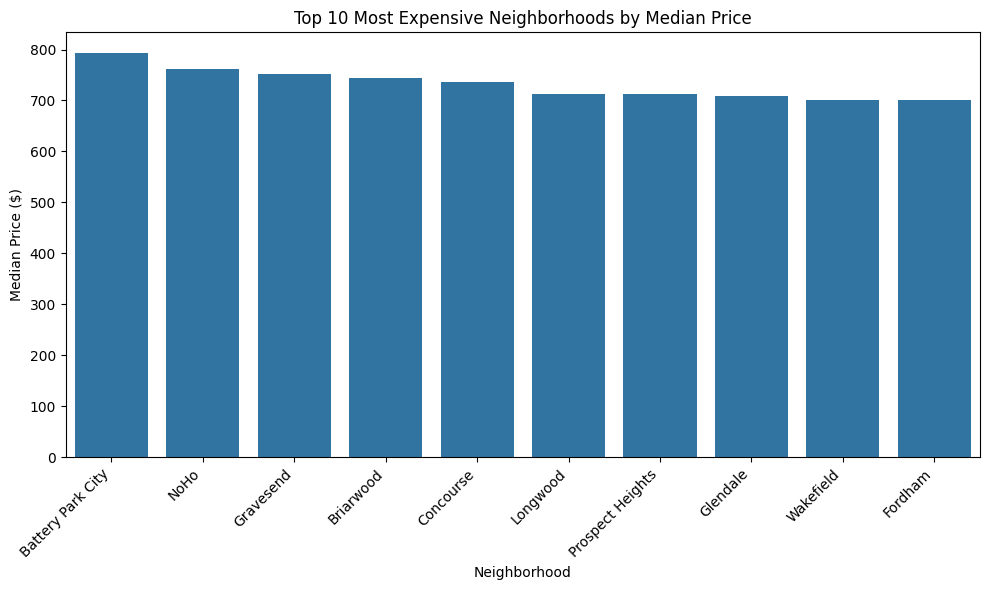

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_median.index, y=top_10_median.values)
plt.title('Top 10 Most Expensive Neighborhoods by Median Price')
plt.ylabel('Median Price ($)')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The bar chart shows the top 10 most expensive **neighborhoods** on Airbnb based on the median nightly price of listings that are active and receive real guest reviews. Battery Park City ranks highest, followed closely by NoHo, Gravesend, and Briarwood. All **neighborhoods** in this chart have median prices exceeding $700 per night, highlighting areas with strong potential for high nightly revenue. This information is valuable for new Airbnb property owners who want to understand where premium markets are located. Choosing areas with higher median prices can lead to higher returns per booking, although it often comes with higher property prices and guest expectations. 

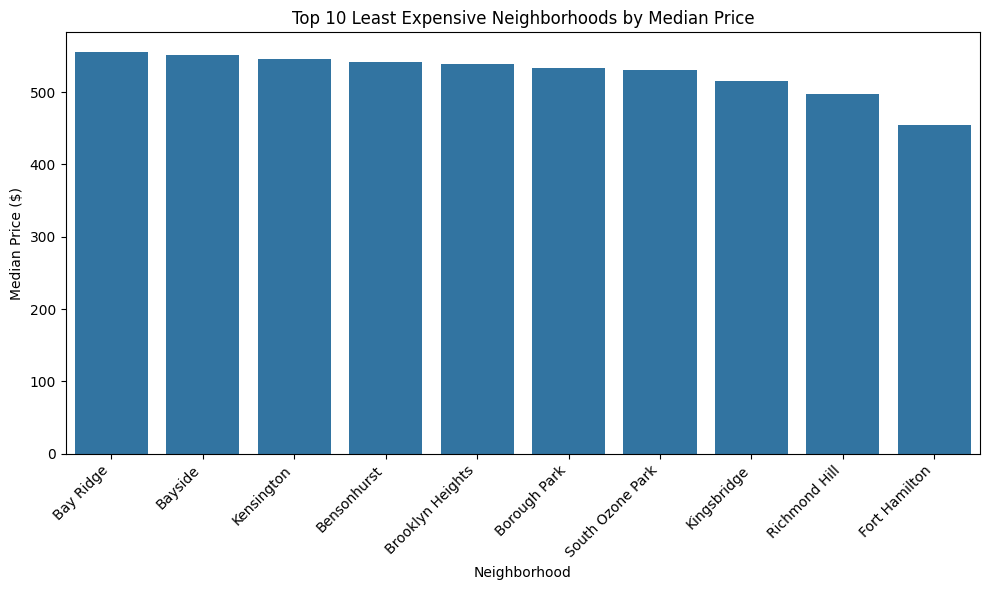

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=last_10_median.index, y=last_10_median.values)
plt.title('Top 10 Least Expensive Neighborhoods by Median Price')
plt.ylabel('Median Price ($)')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This bar chart displays the 10 **neighborhoods** with the lowest median nightly prices on Airbnb, based on filtered and reliable listings. **Neighborhoods** such as Bay Ridge, Bayside, and Kensington offer median nightly prices between $450–$560, making them significantly more affordable compared to premium areas. While these areas might not generate the highest price per night, they could perform well if demand (occupancy) is strong.

In [59]:
total_reviews_by_neighbourhood = filtered_data.groupby('neighbourhood')['number of reviews'].sum()
total_listings_by_neighbourhood = filtered_data['neighbourhood'].value_counts()
reviews_per_listing_ratio = (total_reviews_by_neighbourhood / total_listings_by_neighbourhood).sort_values(ascending=False)
print(reviews_per_listing_ratio.head(20))

neighbourhood
East Elmhurst          99.845209
Springfield Gardens    74.812785
Jamaica                60.108216
St. George             55.553191
Concourse              53.864583
South Slope            52.297587
Gowanus                49.578616
Flushing               49.250323
Prospect Heights       49.149510
Windsor Terrace        48.846890
Queens Village         48.720339
Red Hook               48.674797
Park Slope             46.983361
St. Albans             46.963158
Woodhaven              46.416107
Mott Haven             46.180328
Canarsie               45.806268
Rockaway Beach         45.468750
South Ozone Park       45.076923
East Harlem            44.695511
dtype: float64


To evaluate the true demand in each neighborhood, we calculated the average number of reviews per listing. This metric normalizes the number of reviews based on how many properties exist in each area, offering a more accurate view of guest activity and listing performance.

Unlike total reviews (which may be influenced by how many listings exist in an area), this approach shows how frequently each individual property is reviewed

Key Findings:

- **Concourse** shows a very high level of activity, with around 50 reviews per listing. This neighborhood also appears in the Top 10 Most Expensive Neighborhoods by Median Price, indicating both strong pricing and consistent demand.

- **Prospect Heights** performs similarly, with approximately 49 reviews per listing, also appearing in the Top 10 Most Expensive. This confirms it as one of the most active and valuable areas.

- **South Ozone Park** is particularly interesting: although it falls under the Bottom 10 Cheapest Neighborhoods by Median Price, it records a strong 45 reviews per listing. This suggests high activity levels at a lower cost, making it an efficient and potentially high-yield area.


### **Conclusion**: Concourse – One of the Most Recommended Areas for Future Airbnb Hosts

After a detailed data analysis combined with real estate research, **Concourse (Bronx, NYC)** has emerged as one of the most recommended neighborhoods for future property owners looking to list their homes on Airbnb.

The area shows a **very high level of guest activity**, with an average of **~50 reviews per listing**, placing it among the most active neighborhoods in the city.

At the same time, **property prices remain accessible** compared to other high-performing areas. As of early 2025, the median home price in Concourse is estimated between **$250,000 and $375,000**.

This combination of **strong demand** and **low entry cost** makes Concourse a highly strategic choice for new hosts seeking long-term profitability on the Airbnb platform.
